Existe discurso de ódio nos tweets? Como podemos saber?

Se considerarmos que um discurso assim é racista ou sexista nossa tarefa fica mais clara: queremos saber entre todos os tweets quais deles são racistas ou sexistas.

Como podemos fazer isso? Vamos considerar que um tweet com discurso de ódio vale 1 e sem esse discurso 0.

Qual o primeiro passo para classificarmos tweets? Ter tweets, certo? Então:

# Obtenção dos dados

In [0]:
import pandas as pd

tweets_treino = pd.read_csv('https://raw.githubusercontent.com/cassiasamp/secomp/master/dados/train_tweets.csv')
tweets_teste = pd.read_csv('https://raw.githubusercontent.com/cassiasamp/secomp/master/dados/test_tweets.csv')

# Exploraçao dos dados

In [2]:
tweets_treino.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Vemos que os dados de treino tem 3 colunas, id, um número para identificação, label, são as nossas identificações ou marcações e o texto do tweet, em tweet.

In [3]:
tweets_teste.head(5)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


Podemos dar uma olhada também em quais as quantidades de treino e teste.

In [4]:
len(tweets_treino)

31962

In [5]:
len(tweets_teste)

17197

In [0]:
total_tweets = len(tweets_treino) + len(tweets_teste)

In [7]:
len(tweets_teste)/total_tweets*100

34.98240403588356

In [8]:
len(tweets_treino)/total_tweets*100

65.01759596411644

Repare que vamos treinar com aprox. 65% dos dados e testar com 35%. 

Agora vamos focar nos tweets de treino, o que mais conseguimos entender deles?

In [9]:
tweets_treino.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Sabemos quem foi que escreveu o tweet? Não, certo? Repare que eles anonimizam as pessoas com @user. Mas isso nos dá algum tipo deinfo para resolver o nosso problema? Não, então o que podemos fazer?

Vamos pensar. Se você tem um quarto ou sala que sempre está uma bagunça e um dia está com pressa para sair e quer encontrar o celular, eu te pergunto, é mais fácil achar esse celular se o quarto estiver arrumado ou bagunçado? Se ele estiver arrumado, certo? Com os nossos textos é a mesma coisa.

Se repararmos nesse @user aí ele não adiciona nada, então podemos arrumar esse quarto e nos livrarmos dele.

# Preprocessamento e limpeza dos tweets

Precisamos saber onde está o @ e tirá=lo de lá. Para isso vou chamar o @ do padrao que estamos procurando. E ai para dar match nesse padrão, vamos usar uma expressão regular.

## Removendo @user

In [0]:
import re 

padrao = '@'
arrobas = re.findall(padrao, str(tweets_treino))

Além da expressão vamos também substituir, re.sub, o arroba nos tweets por nada '', uma string vazia.

In [0]:
for arroba in arrobas:
  treino_arrumado = re.sub(arroba, ' ', str(tweets_treino))

In [12]:
treino_arrumado

"          id  label                                              tweet\n0          1      0    user when a father is dysfunctional and is s...\n1          2      0   user  user thanks for #lyft credit i can't us...\n2          3      0                                bihday your majesty\n3          4      0  #model   i love u take with u all the time in ...\n4          5      0             factsguide: society now    #motivation\n5          6      0  [2/2] huge fan fare and big talking before the...\n6          7      0    user camping tomorrow  user  user  user  use...\n7          8      0  the next school year is the year for exams.ð\x9f\x98...\n8          9      0  we won!!! love the land!!! #allin #cavs #champ...\n9         10      0    user  user welcome here !  i'm   it's so #gr...\n10        11      0   â\x86\x9d #ireland consumer price index (mom) climb...\n11        12      0  we are so selfish. #orlando #standwithorlando ...\n12        13      0  i get to see my daddy today!! 

Funcionou! Podemos aproveitar e fazer isso nos dois datasets juntos.

In [13]:
dados = tweets_treino.append(tweets_teste, ignore_index=True) #ignore_index porque eu quero manter o índice que já tenho

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Eu não gostei da saída em string. Vamos transformar o processo em uma função e fazer combinar fazendo um mapeamento da função para nossos dados e o regex com a vetorização do numpy.Que nada mais é que um for loop.

In [0]:
import numpy as np

Exemplo com soma e subtração:

In [0]:
def subtrai_maior_soma_menor(entrada_1, entrada_2):
  
    if entrada_1 > entrada_2:
        return entrada_1 - entrada_2
    else:
        return entrada_1 + entrada_2

In [0]:
vetorizacao = np.vectorize(subtrai_maior_soma_menor)

In [17]:
entrada_1 = [1, 2, 3, 4]
entrada_2 = [2]
subtrai_maior_soma_menor(entrada_1, entrada_2)

[1, 2, 3, 4, 2]

Vamos voltar para os tweets. Queremos chamar a função que achar o regex e o substitui. Vamos montar essa função.

In [0]:
def tchau_padrao(texto, padrao):
  
  padroes = re.findall(padrao, texto)
  
  for um_padrao in padroes:
    texto = re.sub(um_padrao, ' ', texto)
    
  return texto

In [0]:
# \w busca global pelo caractere 
# * = com uma ou mais ocorrências

expressao_regular = "@[\w]*"

# vou aproveitar e curar uma coluna de tweet arrumado, em en, tidy tweet
dados['tidy_tweet'] = np.vectorize(tchau_padrao)(dados['tweet'], expressao_regular)

Vamos dar uma olhada nos nosso dados para ver se funcionou.

In [20]:
dados.head(7)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦


Beleza, funcionou. Agora já não temos mais @user nos nossos tweets.

## Removendo caracteres especiais

Repare também que se olharmos para esses dois pontos aqui, um ponto, virgula, caracter especial ou número sabemos algo sobre a classificação que queremos fazer? Não, né. Repare que pontos, virgulas, números e caracteres especiais não são expressivos sobre o sentimento do nosso texto, então são considerados ruídos e precisamos limpar o nosso texto também desses ruídos.


In [0]:
# todos os pontos, virgulas e caracteres especiais
expressao_regular_2 = "[^a-zA-Z#]"

dados['tidy_tweet'] = dados['tidy_tweet'].str.replace(expressao_regular_2, ' ')

In [22]:
dados.head(15)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause ...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [0]:
#caso eu tenha problemas dislexicos
#dados.drop(columns=['tidy tweets', 'tidy tweet'])

Será que já acabamos? Repare também que podemos ter interjeições como ahm, hum, hmm e essas palavras ajudam a gente a saber o sentimento? Também só acrescentam ruído. Logo, vamos filtrá-las. 

## Removendo palavras curtas

Palavras assim são chamadas de stop words (palavras de parada).

Para filtrá-las vamos usar algo que se chama lambda. E funciona mais ou menos assim:

In [24]:
lambda x : x

<function __main__.<lambda>>

In [25]:
(lambda x : x)(1)

1

In [26]:
(lambda x : x*5)(1)

5

Vamos combinar a nossa lambda com a divisao split dos dados em palavras, sua posterior junção com join e a verificação de se a palavra é curta, até 3 caracteres.

In [0]:
dados['tidy_tweet'] = dados['tidy_tweet'].apply(lambda x: ' '.join([palavra for palavra in x.split() if len(palavra)>3]))

In [28]:
(lambda x: ' '.join([word for word in x.split() if len(word)>3]))('exemplo basta eu escrever algo até três caracteres e a lambda vai ter excluido')

'exemplo basta escrever algo três caracteres lambda excluido'

### Cuidado ao usar lambdas

Uma nota sobre lambdas que são conhecidas também como funções anônimas, se puder evitá-las, evite, pois melhor a leitura do código. É que nesse caso limpeza de dados é a parte mais dolorosa do processo O.O', estamos quase acabando.

jà olhamos para coisas do conjunto dos tweets como pontos e virgulas, caracteres especiais e começamos a olhar para as palavras com o tamanho delas. Podemos nos atentar bem mais para as palavras agora. Se você vai entender um texto, é mais fácil se alguémfalareletodomuitorápidopravocê? Ou se você  for  ouvindo  palavra  por  palavra  de va ga ri nho? O segundo né? O que podemos fazer que é parecido com isso e nos permite mexer mais no texto e dividir os tweets em suas menores unidades, palavras ou tokens..

Isso também é chamado de tokenização.

In [29]:
tweet_tokenizado = dados['tidy_tweet'].apply(lambda x: x.split())
tweet_tokenizado.head(25)

0     [when, father, dysfunctional, selfish, drags, ...
1     [thanks, #lyft, credit, cause, they, offer, wh...
2                               [bihday, your, majesty]
3                      [#model, love, take, with, time]
4                    [factsguide, society, #motivation]
5     [huge, fare, talking, before, they, leave, cha...
6                            [camping, tomorrow, danny]
7     [next, school, year, year, exams, think, about...
8     [love, land, #allin, #cavs, #champions, #cleve...
9                                       [welcome, here]
10    [#ireland, consumer, price, index, climbed, fr...
11    [selfish, #orlando, #standwithorlando, #pulses...
12                    [daddy, today, days, #gettingfed]
13    [#cnn, calls, #michigan, middle, school, build...
14    [comment, #australia, #opkillingbay, #seasheph...
15    [ouch, junior, angry, #got, #junior, #yugyoem,...
16      [thankful, having, paner, #thankful, #positive]
17                                     [retweet,

Ao fazermos isso, podemos agora olhar mais para as palavras individuais.

Olhando para os nossos tweets, podemos simplificar ainda mais.Veja que palavras como thanks, thank, thankful tem todas uma origem parecida, podemos ao invés de tentar entendê-las assim, deixá-las nessa origem, tirando os seus sufixos. Esse processo se chama estematização ou stemming.

## Normalizando as palavras

Para isso, vamos usar uma lib especializada em manipulação de linguagem que é o nltk e o seu originador ou stemmer.

In [0]:
from nltk.stem.porter import *

stemmer = PorterStemmer()

In [31]:
tweet_tokenizado = tweet_tokenizado.apply(lambda x: [stemmer.stem(palavra) for palavra in x]) # stematização
tweet_tokenizado.head(25)

0     [when, father, dysfunct, selfish, drag, kid, i...
1     [thank, #lyft, credit, caus, they, offer, whee...
2                               [bihday, your, majesti]
3                      [#model, love, take, with, time]
4                          [factsguid, societi, #motiv]
5     [huge, fare, talk, befor, they, leav, chao, di...
6                               [camp, tomorrow, danni]
7     [next, school, year, year, exam, think, about,...
8     [love, land, #allin, #cav, #champion, #clevela...
9                                        [welcom, here]
10    [#ireland, consum, price, index, climb, from, ...
11    [selfish, #orlando, #standwithorlando, #pulses...
12                       [daddi, today, day, #gettingf]
13    [#cnn, call, #michigan, middl, school, build, ...
14    [comment, #australia, #opkillingbay, #seasheph...
15    [ouch, junior, angri, #got, #junior, #yugyoem,...
16                 [thank, have, paner, #thank, #posit]
17                                      [retweet

Repare que agora as palavras estão no 'singular' e sem declinações.

Agora, vamos reunir esses tokens para formarmos frases novamente e voltá-los para os nossos dados.

In [0]:
for token in range(len(tweet_tokenizado)):
    tweet_tokenizado[token] = ' '.join(tweet_tokenizado[token])

In [0]:
dados['tidy_tweet'] = tweet_tokenizado

In [34]:
dados.head(5)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


# Perguntas e visualizações

Agora que estamos mais íntimos dos nossos dados, podemos começar a tentar responder algumas perguntas.

* Quais são as palavras mais comuns no dataset?
* Quais são as palavras que mais ocorrem em tweets negativos e em tweets positivos?
* Quantas hashtags tem em um tweet?
* Que tendências eu tenho no meu dataset?
* Será que tem alguma tendência associada com os sentimentos? Será que a tendência e os sentimento são compatíveis?

## Entendendo quais são as palavras mais usadas com word cloud

Primeiro vamos juntar nossas palavras de novo.

In [0]:
todas_as_palavras = ' '.join([texto for texto in dados['tidy_tweet']])

In [36]:
todas_as_palavras

'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit retweet agre #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl 

Agora podemos criar o word cloud.

In [0]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(todas_as_palavras)

In [38]:
wordcloud

Vamos plota-lo/ ebibi-lo com matplotlib.

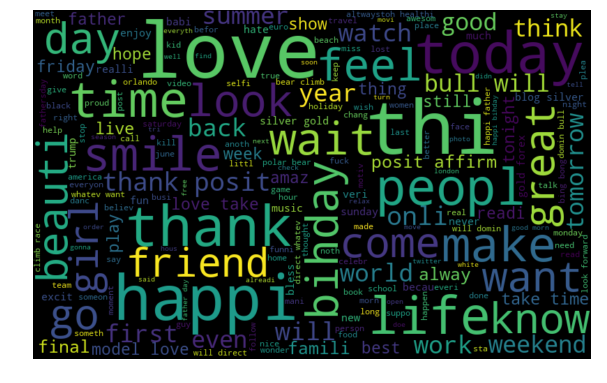

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Como nossos dados possuel labels (que foram feitas manualmente) podemos fazer uma wordcloud só para sentimentos positvos ou 0 e outra para coisas complicadas ou 1.

## Wordcloud positiva

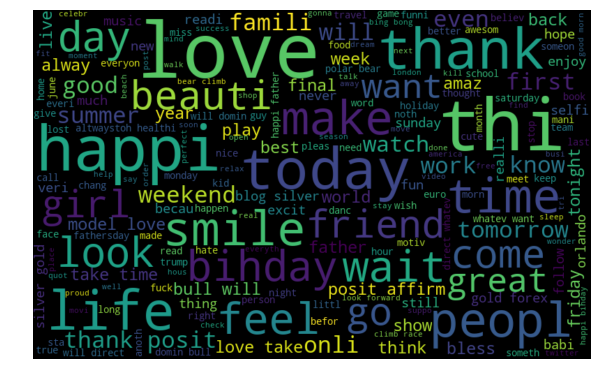

In [41]:
palavras_normais =' '.join([texto for texto in dados['tidy_tweet'][dados['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(palavras_normais)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Wordcloud complicada

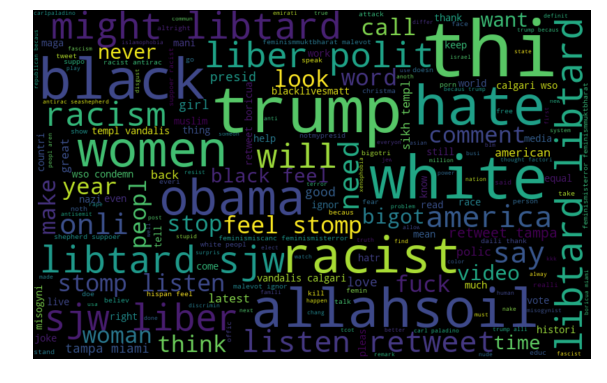

In [42]:
palavras_complicadas =' '.join([texto for texto in dados['tidy_tweet'][dados['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(palavras_complicadas)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Podemos perceber com essas visualizações que as duas wordclous fazem sentido, então temos bons dados para trabalharmos.

In [0]:
#  TODO: 1. hashtags, 2. plot1, 3. plot2, 4. BOW, 5. TF IDF, 6. Modelo
